In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [25]:
# normalize and flatten later
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [26]:
# dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [27]:
# Split training set into train & validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_ds, val_ds = random_split(train_dataset, [train_size, val_size])

In [28]:
# data loader
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [29]:
# model Aricitecture

class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)

In [30]:
model = MNISTClassifier()

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def train_model(model, train_loader, val_loader, epochs):
    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images, labels
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = 100 * correct / total
        train_acc_list.append(train_accuracy)

        # model accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images, labels
                outputs = model(images)
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_accuracy = 100 * correct / total
        val_acc_list.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}]  Train Acc: {train_accuracy:.2f}%  Val Acc: {val_accuracy:.2f}%")
    return train_acc_list, val_acc_list


In [33]:
# train model

train_acc, val_acc = train_model(model, train_loader, val_loader, epochs=15)

Epoch [1/15]  Train Acc: 91.54%  Val Acc: 95.80%
Epoch [2/15]  Train Acc: 95.42%  Val Acc: 97.30%
Epoch [3/15]  Train Acc: 96.29%  Val Acc: 97.18%
Epoch [4/15]  Train Acc: 96.79%  Val Acc: 97.60%
Epoch [5/15]  Train Acc: 97.32%  Val Acc: 97.58%
Epoch [6/15]  Train Acc: 97.52%  Val Acc: 97.68%
Epoch [7/15]  Train Acc: 97.53%  Val Acc: 97.92%
Epoch [8/15]  Train Acc: 97.93%  Val Acc: 97.87%
Epoch [9/15]  Train Acc: 98.04%  Val Acc: 97.93%
Epoch [10/15]  Train Acc: 98.12%  Val Acc: 98.32%
Epoch [11/15]  Train Acc: 98.30%  Val Acc: 98.18%
Epoch [12/15]  Train Acc: 98.39%  Val Acc: 98.20%
Epoch [13/15]  Train Acc: 98.46%  Val Acc: 98.38%
Epoch [14/15]  Train Acc: 98.45%  Val Acc: 98.28%
Epoch [15/15]  Train Acc: 98.64%  Val Acc: 98.42%


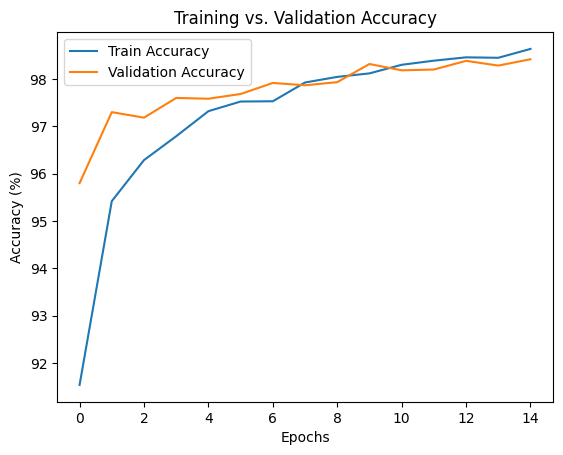

In [34]:
# Visualization

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

In [35]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = outputs.max(1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f'Final Test Accuracy: {100 * correct / total:.2f}%')

Final Test Accuracy: 98.41%
